# Importing Librareis

In [27]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('Twitter_Data.csv')

In [3]:
df.head(4)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0


<AxesSubplot: xlabel='category', ylabel='count'>

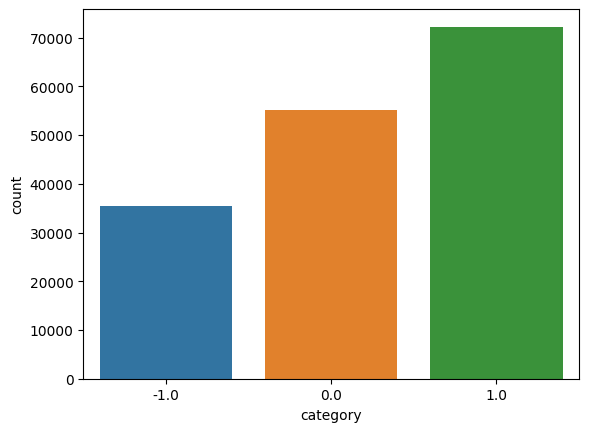

In [30]:
sns.countplot(data=df,x='category')

Negative : -1------
Neutral : 0-----
Positive : 1

# Preprocessing

In [4]:
df['clean_tweet'] = df['clean_text'].str.replace('[^a-zA-Z]', ' ')

In [5]:
df.head()

,clean_text,category,clean_tweet
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...


In [6]:
df.dropna(inplace = True)

# Stemming

In [7]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [8]:
token = df['clean_tweet'].apply(lambda x : x.split())
token.head()

0    [when, modi, promised, minimum, government, ma...
1    [talk, all, the, nonsense, and, continue, all,...
2    [what, did, just, say, vote, for, modi, welcom...
3    [asking, his, supporters, prefix, chowkidar, t...
4    [answer, who, among, these, the, most, powerfu...
Name: clean_tweet, dtype: object

# Tokenizing

In [9]:
token = token.apply(lambda x: [stemmer.stem(word) for word in x])

In [10]:
token.head()

0    [when, modi, promis, minimum, govern, maximum,...
1    [talk, all, the, nonsens, and, continu, all, t...
2    [what, did, just, say, vote, for, modi, welcom...
3    [ask, hi, support, prefix, chowkidar, their, n...
4    [answer, who, among, these, the, most, power, ...
Name: clean_tweet, dtype: object

In [11]:
tokenized_tweet = token

In [12]:
tokenized_tweet.head()

0    [when, modi, promis, minimum, govern, maximum,...
1    [talk, all, the, nonsens, and, continu, all, t...
2    [what, did, just, say, vote, for, modi, welcom...
3    [ask, hi, support, prefix, chowkidar, their, n...
4    [answer, who, among, these, the, most, power, ...
Name: clean_tweet, dtype: object

In [26]:
token[148] = ['hello']
token[130448] = ['hello']
token[130448] = ['hello']
token[155642] = ['hello']
token[155698] = ['hello']
token[155770] = ['hello']
token[158693] = ['hello']
token[155770] = ['hello']
token[158694] = ['hello']
token[159442] = ['hello']
token[160559] = ['hello']
token[160560] = ['hello']
token[159443] = ['hello']
# filling missing indexes

In [14]:
for i in range(len(token)):
    tokenized_tweet[i] = " ".join(token[i])

In [15]:
tokenized_tweet.head()

0    when modi promis minimum govern maximum govern...
1    talk all the nonsens and continu all the drama...
2    what did just say vote for modi welcom bjp tol...
3    ask hi support prefix chowkidar their name mod...
4    answer who among these the most power world le...
Name: clean_tweet, dtype: object

In [16]:
df['tweets'] = tokenized_tweet

In [17]:
df.head()

,clean_text,category,clean_tweet,tweets
0,when modi promised “minimum government maximum...,-1.0,when modi promised minimum government maximum...,when modi promis minimum govern maximum govern...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...,talk all the nonsens and continu all the drama...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcom bjp tol...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...,ask hi support prefix chowkidar their name mod...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...,answer who among these the most power world le...


# Creating Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_df=.8,min_df=2,max_features=3000,stop_words='english')
bow = bow_vec.fit_transform(df['tweets'])

# Importing and Training Model 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow,df['category'],random_state=0,test_size=.02)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
pred = model.predict(X_test)

# Testing Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(pred,y_test)

0.8279141104294478